In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA


In [5]:
digits = load_digits()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [77]:
print('Shape of digits.data :',digits.data.shape)
print('Shape of digits.target',digits.target.shape)
print('Shape of image :',digits.images.shape)

Shape of digits.data : (1797, 64)
Shape of digits.target (1797,)
Shape of image : (1797, 8, 8)


# Original Images

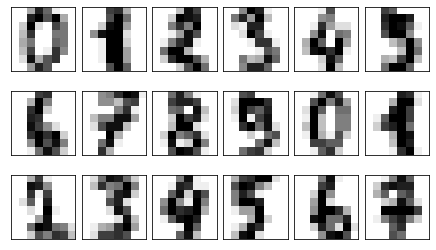

In [84]:
#printing some digits
fig,ax = plt.subplots(3,6, figsize=(7.5,4.5), subplot_kw={'xticks':[], 'yticks':[]},
                     gridspec_kw=dict(hspace=.1, wspace=.1))

for i, ax in enumerate(ax.flat):
    ax.imshow(digits.images[i].reshape(8,8), cmap='binary')

In [71]:
#defining PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
new_data = pca.transform(digits.data)

In [80]:
print('Origina shape :',digits.images.shape)
print('After reducing :',new_data.shape)

Origina shape : (1797, 8, 8)
After reducing : (1797, 2)


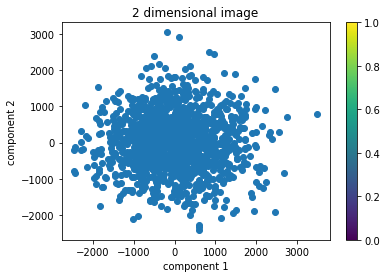

In [95]:
#plotting data
plt.scatter(new_dim[:,0], new_dim[:,1], cmap='spectral')
plt.title('2 dimensional image')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# Noise Filtering Using PCA

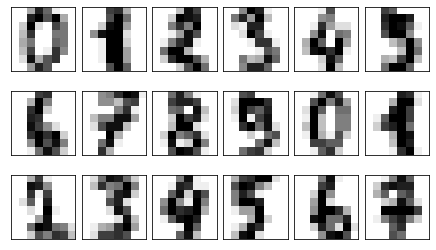

In [99]:
def image_print(digits):
    fig, ax = plt.subplots(3,6, figsize=(7.5,4.5), subplot_kw={'xticks':[], 'yticks':[]},
                     gridspec_kw=dict(hspace=.1, wspace=.1))

    for i, ax in enumerate(ax.flat):
        ax.imshow(digits[i].reshape(8,8), cmap='binary')
        
image_print(digits.data)

Those are original images

Shape of noisy data : (1797, 64)


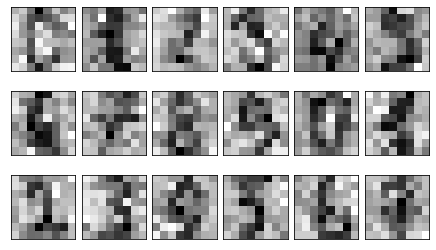

In [104]:
#making noise on images
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

#printing noisy images
image_print(noisy)
print('Shape of noisy data :',noisy.shape)

Those are noisy data

In [101]:
pca = PCA(.5)
pca.fit(noisy)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.

In [108]:
new_dim = pca.transform(noisy)
print('Shape of noisy data :',new_dim.shape)

Shape of noisy data : (1797, 12)


Now column number change to 12 

In [112]:
noise_filtered = pca.inverse_transform(new_dim)
print('Shape of filtered data :',noise_filtered.shape)

Shape of filtered data : (1797, 64)


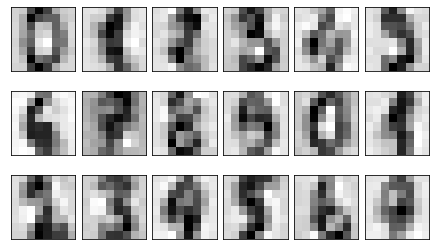

In [113]:
#printing filtered data
image_print(noise_filtered)

Those are filtered data

# printing images after dimensionality reduce

In [14]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [15]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [27]:
print('face name :',faces.target_names)
print('image shape :',faces.images.shape)

face name : ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
image shape : (1348, 62, 47)


In [16]:
print('Shape of faces.data :',faces.data.shape)
print('Shape of faces.target :',faces.target.shape)

Shape of faces.data : (1348, 2914)
Shape of faces.target : (1348,)


In [64]:
#declaring PCA
rpca = RandomizedPCA(n_components=150)
rpca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
new_dim = rpca.transform(faces.data)

In [63]:
inverse = rpca.inverse_transform(new_dim)
inverse.shape

(1348, 2914)

Text(0.5, 1.0, 'with 150 dimension')

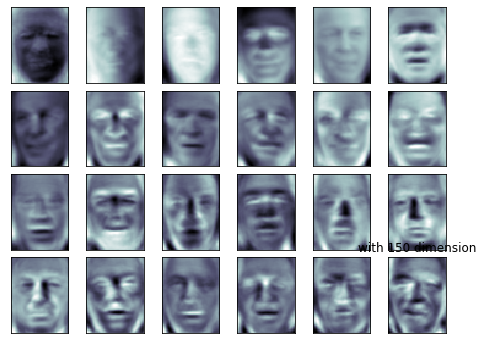

In [53]:
fig,ax = plt.subplots(4,6, figsize=(8,6), 
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, axes in enumerate(ax.flat):
    axes.imshow(rpca.components_[i].reshape(62,47), cmap='bone')
    
plt.title('with 150 dimension')

Text(0, 0.5, 'cumulative explained variance')

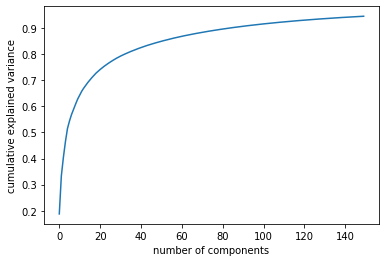

In [96]:
#how to choose n_components 
plt.plot(np.cumsum(rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We see that these 150 components account for just over 90% of the variance. That would lead us to believe 
that using these 150 components, we would recover most of the essential characteristics of the data

Text(0, 0.5, 'reversed image')

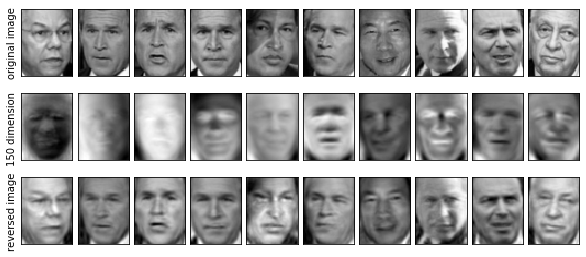

In [67]:
#printing origina and processed image together
fig, ax = plt.subplots(3,10, figsize=(10,4.5), 
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=.1, wspace=.1))

for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1,i].imshow(rpca.components_[i].reshape(62,47), cmap='binary_r')
    ax[2,i].imshow(inverse[i].reshape(62,47), cmap='binary_r')

ax[0,0].set_ylabel('original image')
ax[1,0].set_ylabel('150 dimension ')
ax[2,0].set_ylabel('reversed image')
